In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import time

In [2]:
def generate_kernel_2d(m, sigma):
    a = (m - 1) / 2
    b = (m - 1) / 2

    y, x = np.ogrid[-a:a + 1, -b:b + 1]
    val = 2 * sigma * sigma
    kernel = np.exp(-(x * x + y * y) / val) / (np.pi * val)
    
    sum = kernel.sum()
    kernel /= sum

    kernel = np.expand_dims(kernel, -1)
    kernel = np.expand_dims(kernel, -1)

    return kernel

In [3]:
def generate_kernel_seperate(m, sigma):
    a = (m - 1) / 2

    y, x = np.ogrid[0:1, -a:a + 1]
    val = 2 * sigma * sigma
    kernel_1 = np.exp(-(x * x + y * y) / val) / (np.pi * val)
    
    sum = kernel_1.sum()
    kernel_1 /= sum

    kernel_1 = np.expand_dims(kernel_1, -1)
    kernel_1 = np.expand_dims(kernel_1, -1)

    y, x = np.ogrid[-a:a + 1, 0:1]
    val = 2 * sigma * sigma
    kernel_2 = np.exp(-(x * x + y * y) / val) / (np.pi * val)
    
    sum = kernel_2.sum()
    kernel_2 /= sum

    kernel_2 = np.expand_dims(kernel_2, -1)
    kernel_2 = np.expand_dims(kernel_2, -1)

    return kernel_1, kernel_2

In [11]:
if __name__ == "__main__":
    (imgs, _), _ = tf.keras.datasets.cifar10.load_data()

    size_m = [3, 7, 15]
    sigmas = [1, 3, 5]

    img_A = imgs[1]
    img_A = np.expand_dims(img_A, 0)

    img_A = tf.constant(img_A, dtype=tf.float32)

Execute Time:  0.2603466510772705 sec


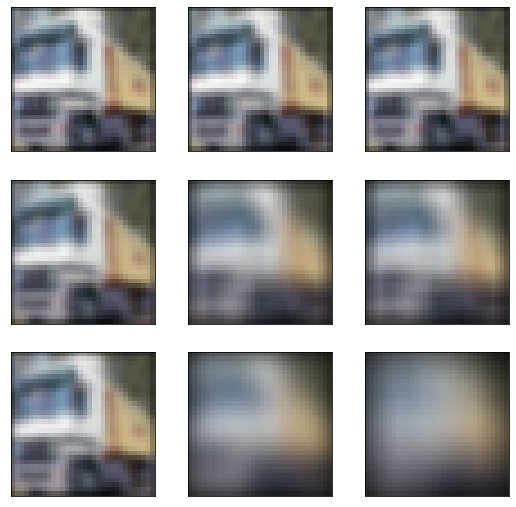

In [15]:
    #################################
    #      2D Gaussian Filter       #
    #################################
    
    start_time = time.time()

    fig = plt.figure(figsize = (9, 9))
    i = 0
    for m in size_m:
        for sigma in sigmas:
            kernel = generate_kernel_2d(m, sigma)

            kernel = tf.constant(kernel, dtype=tf.float32)

            results = []
            for idx in range(3):
                result = tf.nn.conv2d(img_A[:, :, :, idx:idx+1], kernel, strides=[1,1,1,1], padding="SAME")
                results.append(result)
            
            img_B = np.concatenate(results, axis=-1)
            img_B /= 255
            
            subplot = fig.add_subplot(3, 3, i + 1)
            i = i + 1
    
            subplot.set_xticks([])
            subplot.set_yticks([])

            subplot.imshow(img_B[0])
    
    end_time = time.time()
    print("Execute Time: ", end_time - start_time, "sec")

    plt.show()
    fig.savefig('2D_Gaussain_Filter.png')


Execute Time:  0.3015139102935791 sec


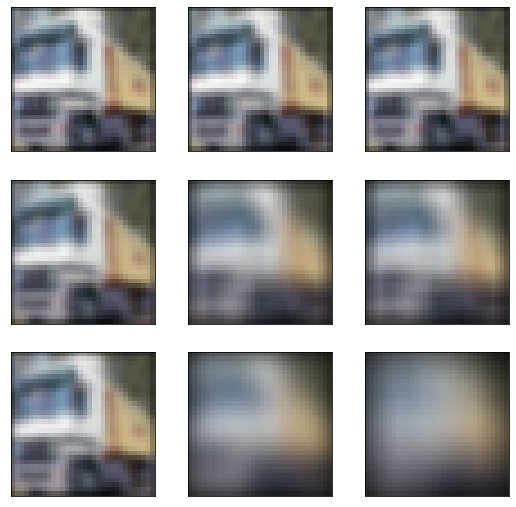

In [14]:
    #################################
    #      2D Gaussian Filter       #
    #      (Separated Filter)       #
    #################################

    start_time = time.time()

    fig = plt.figure(figsize = (9, 9))
    i = 0
    for m in size_m:
        for sigma in sigmas:
            kernel_y, kernel_x = generate_kernel_seperate(m, sigma)

            kernel_y = tf.constant(kernel_y, dtype=tf.float32)
            kernel_x = tf.constant(kernel_x, dtype=tf.float32)

            results = []
            for idx in range(3):
                result = tf.nn.conv2d(img_A[:, :, :, idx:idx+1], kernel_y, strides=[1,1,1,1], padding="SAME")
                result = tf.nn.conv2d(result, kernel_x, strides=[1,1,1,1], padding="SAME")
                results.append(result)
            
            img_B = np.concatenate(results, axis=-1)
            img_B /= 255
            
            subplot = fig.add_subplot(3, 3, i + 1)
            i = i + 1
    
            subplot.set_xticks([])
            subplot.set_yticks([])

            subplot.imshow(img_B[0])
    end_time = time.time()
    print("Execute Time: ", end_time - start_time, "sec")
    
    plt.show()
    fig.savefig('2D_Gaussain_Filter_Separated.png')
